<a href="https://colab.research.google.com/github/rajeevfromkrec/pytorch/blob/master/tensor_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/udacity/deep-learning-v2-pytorch.git

Cloning into 'deep-learning-v2-pytorch'...
remote: Enumerating objects: 1078, done.
remote: Total 1078 (delta 0), reused 0 (delta 0), pack-reused 1078
Receiving objects: 100% (1078/1078), 148.81 MiB | 25.35 MiB/s, done.
Resolving deltas: 100% (448/448), done.
Checking out files: 100% (270/270), done.


In [3]:
!ls

deep-learning-v2-pytorch  sample_data


In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import helper


In [5]:
x= torch.rand(3,2)
x

tensor([[0.6357, 0.1556],
        [0.6999, 0.0675],
        [0.3387, 0.2333]])

In [7]:
y= torch.ones(x.size())
y

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [8]:
z=x+y
z

tensor([[1.6357, 1.1556],
        [1.6999, 1.0675],
        [1.3387, 1.2333]])

In [9]:
z[0]

tensor([1.6357, 1.1556])

In [10]:
z[:,1:]

tensor([[1.1556],
        [1.0675],
        [1.2333]])

In [12]:
a= np.random.rand(4,3)
a

array([[0.25021015, 0.1208815 , 0.47053239],
       [0.65903462, 0.64879001, 0.35247354],
       [0.09002556, 0.97518939, 0.3219402 ],
       [0.66435694, 0.71794643, 0.68962122]])

In [13]:
b=torch.from_numpy(a)
b

tensor([[0.2502, 0.1209, 0.4705],
        [0.6590, 0.6488, 0.3525],
        [0.0900, 0.9752, 0.3219],
        [0.6644, 0.7179, 0.6896]], dtype=torch.float64)

In [14]:
b.view(3,4)

tensor([[0.2502, 0.1209, 0.4705, 0.6590],
        [0.6488, 0.3525, 0.0900, 0.9752],
        [0.3219, 0.6644, 0.7179, 0.6896]], dtype=torch.float64)

In [15]:
b.reshape(3,4)

tensor([[0.2502, 0.1209, 0.4705, 0.6590],
        [0.6488, 0.3525, 0.0900, 0.9752],
        [0.3219, 0.6644, 0.7179, 0.6896]], dtype=torch.float64)

In [16]:
b.resize_(2,6)

tensor([[0.2502, 0.1209, 0.4705, 0.6590, 0.6488, 0.3525],
        [0.0900, 0.9752, 0.3219, 0.6644, 0.7179, 0.6896]], dtype=torch.float64)

In [17]:
b.numpy()

array([[0.25021015, 0.1208815 , 0.47053239, 0.65903462, 0.64879001,
        0.35247354],
       [0.09002556, 0.97518939, 0.3219402 , 0.66435694, 0.71794643,
        0.68962122]])

In [18]:
import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as tt
from  torch.utils.data import  DataLoader
from torchvision import datasets
import matplotlib.pyplot as plt


In [37]:
transform= tt.Compose([tt.ToTensor()])

In [38]:
train_ds=datasets.MNIST(root='data/',download=True,train=True,transform=transform)
train_dl=DataLoader(train_ds,batch_size=64,shuffle=True)

In [26]:
test_ds=datasets.MNIST('MNIST_data/',download=True,train=False,transform=transform)
test_dl=DataLoader(test_ds,batch_size=64,shuffle=True)

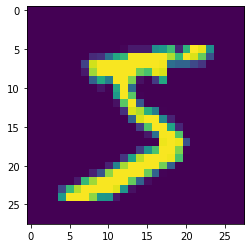

In [44]:
img,label=train_ds[0]

plt.imshow(img.reshape(-1,28))

In [43]:
img.shape

torch.Size([1, 28, 28])

In [30]:
for batch in train_dl:
  images,labels=batch
  print(lables)
  break

RuntimeError: ignored

In [47]:
import torch.nn.functional as F
class basicclassification(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1=nn.Linear(784,128)
    self.fc2=nn.Linear(128,64)
    self.fc3=nn.Linear(64,10)

  def forward(self, x):
    x=x.reshape(x.size(0),-1)
    x=self.fc1(x)
    x=f.relu(x)
    x=self.fc2(x)
    x=f.relu(x)
    x=self.fc3(x)
    out=F.softmax(x,dim=1)
    return out


In [48]:
model=basicclassification()

In [49]:
model

basicclassification(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)